In [64]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [65]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.h5'

# 分類数設定

In [66]:
NUM_CLASSES = 3

# 学習データ読み込み

In [67]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [68]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [71]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_8 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,103 (4.31 KB)

 Trainable params: 1,103 (4.31 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [73]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [74]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 12s 610ms/step - accuracy: 0.2422 - loss: 1.2996
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3022 - loss: 1.1763 - val_accuracy: 0.8486 - val_loss: 0.8822
Epoch 2/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5625 - loss: 0.9200
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5648 - loss: 0.8922 - val_accuracy: 0.9662 - val_loss: 0.6224
Epoch 3/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7578 - loss: 0.6894
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7671 - loss: 0.6583 - val_accuracy: 1.0000 - val_loss: 0.4491
Epoch 4/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9062 - loss: 0.5353
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.5200 - val_accuracy: 1.0000 - val_loss: 0.2913
Epoch 5/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8516 - loss: 0.4582
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8715 - loss: 0.4217 - val_accuracy: 1.0000 - val_loss: 0.1878
Epoch 6/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8984 - loss: 0.3556
Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8971 - loss: 0.3448 - val_accuracy: 1.0000 - val_loss: 0.1242
Epoch 7/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8906 - loss: 0.3093
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9050 - loss: 0.2945 - val_accuracy: 1.0000 - val_loss: 0.0840
Epoch 8/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9219 - loss: 0.2357
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9209 - loss: 0.2397 - val_accuracy: 1.0000 - val_loss: 0.0533
Epoch 9/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9297 - loss: 0.2141
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9345 - loss: 0.2022 - val_accuracy: 1.0000 - val_loss: 0.0383
Epoch 10/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1614
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9423 - loss: 0.1737 - val_accuracy: 1.0000 - val_loss: 0.0274
Epoch 11/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1607
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1715 - val_accuracy: 1.0000 - val_loss: 0.0220
Epoch 12/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.1255
Epoch 12: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9493 - loss: 0.1553 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 13/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1249
Epoch 13: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1362 - val_accuracy: 1.0000 - val_loss: 0.0154
Epoch 14/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9375 - loss: 0.1323
Epoch 14: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9561 - loss: 0.1311 - val_accuracy: 1.0000 - val_loss: 0.0110
Epoch 15/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9531 - loss: 0.1089
Epoch 15: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9605 - loss: 0.1281 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 16/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9219 - loss: 0.1591
Epoch 16: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9587 - loss: 0.1217 - val_accuracy: 1.0000 - val_loss: 0.0082
Epoch 17/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0770
Epoch 17: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9669 - loss: 0.1086 - val_accuracy: 1.0000 - val_loss: 0.0077
Epoch 18/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9375 - loss: 0.1754
Epoch 18: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9650 - loss: 0.1065 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 19/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0879
Epoch 19: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9718 - loss: 0.0945 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 20/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0859
Epoch 20: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9642 - loss: 0.0970 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 21/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0694
Epoch 21: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.0931 - val_accuracy: 1.0000 - val_loss: 0.0044
Epoch 22/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0603
Epoch 22: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9719 - loss: 0.0869 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 23/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0581
Epoch 23: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9716 - loss: 0.0904 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 24/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0376
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0740 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 25/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0612
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9738 - loss: 0.0761 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 26/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0504
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9743 - loss: 0.0687 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 27/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0686
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.0823 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 28/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0865
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9761 - loss: 0.0816 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 29/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9844 - loss: 0.0627
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9770 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 30/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0375
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9790 - loss: 0.0667 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 31/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.0734
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.0591 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 32/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0855
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9796 - loss: 0.0693 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 33/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0387
Epoch 33: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0649 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 34/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0497
Epoch 34: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9789 - loss: 0.0600 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 35/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0174
Epoch 35: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9760 - loss: 0.0640 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 36/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0977
Epoch 36: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9792 - loss: 0.0666 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 37/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0483
Epoch 37: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9769 - loss: 0.0623 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 38/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9688 - loss: 0.0629
Epoch 38: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0618 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 39/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0390
Epoch 39: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0606 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 40/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0631
Epoch 40: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0628 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 41/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9531 - loss: 0.0812
Epoch 41: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9712 - loss: 0.0736 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 42/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9844 - loss: 0.0703
Epoch 42: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9774 - loss: 0.0684 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 43/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0488
Epoch 43: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0566 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 44/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0561
Epoch 44: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9820 - loss: 0.0558 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 45/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0781
Epoch 45: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.0663 - val_accuracy: 1.0000 - val_loss: 9.7500e-04
Epoch 46/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0641
Epoch 46: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9768 - loss: 0.0584 - val_accuracy: 1.0000 - val_loss: 9.4428e-04
Epoch 47/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0632
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9798 - loss: 0.0657 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 48/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0279
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9797 - loss: 0.0533 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 49/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.0964
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9772 - loss: 0.0650 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 50/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0434
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0596 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 51/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0391
Epoch 51: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0605 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 52/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0186
Epoch 52: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0491 - val_accuracy: 1.0000 - val_loss: 8.7837e-04
Epoch 53/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0202
Epoch 53: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9777 - loss: 0.0551 - val_accuracy: 1.0000 - val_loss: 8.5784e-04
Epoch 54/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0280
Epoch 54: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9852 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 55/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0413
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9782 - loss: 0.0556 - val_accuracy: 1.0000 - val_loss: 7.9531e-04
Epoch 56/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0250
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 7.5976e-04
Epoch 57/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0951
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0542 - val_accuracy: 1.0000 - val_loss: 6.5247e-04
Epoch 58/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.1007
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0601 - val_accuracy: 1.0000 - val_loss: 7.9783e-04
Epoch 59/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0789
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0527 - val_accuracy: 1.0000 - val_loss: 6.9148e-04
Epoch 60/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0284
Epoch 60: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0442 - val_accuracy: 1.0000 - val_loss: 8.5792e-04
Epoch 61/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0248
Epoch 61: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 6.1111e-04
Epoch 62/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0411
Epoch 62: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0553 - val_accuracy: 1.0000 - val_loss: 8.2255e-04
Epoch 63/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0482
Epoch 63: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9824 - loss: 0.0495 - val_accuracy: 1.0000 - val_loss: 6.7007e-04
Epoch 64/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0394
Epoch 64: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 1.0000 - val_loss: 4.1583e-04
Epoch 65/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0305
Epoch 65: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0450 - val_accuracy: 1.0000 - val_loss: 4.7497e-04
Epoch 66/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0220
Epoch 66: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 6.2186e-04
Epoch 67/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0328
Epoch 67: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9817 - loss: 0.0467 - val_accuracy: 1.0000 - val_loss: 5.8167e-04
Epoch 68/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0304
Epoch 68: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 7.1596e-04
Epoch 69/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9844 - loss: 0.0517
Epoch 69: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0434 - val_accuracy: 1.0000 - val_loss: 4.9272e-04
Epoch 70/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0306
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9849 - loss: 0.0421 - val_accuracy: 1.0000 - val_loss: 4.2274e-04
Epoch 71/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0365
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0418 - val_accuracy: 1.0000 - val_loss: 5.2730e-04
Epoch 72/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0763
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9845 - loss: 0.0465 - val_accuracy: 1.0000 - val_loss: 5.7911e-04
Epoch 73/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0720
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9847 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 5.4570e-04
Epoch 74/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0789
Epoch 74: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9834 - loss: 0.0466 - val_accuracy: 1.0000 - val_loss: 6.2146e-04
Epoch 75/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0223
Epoch 75: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9809 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 4.8737e-04
Epoch 76/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0296
Epoch 76: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0409 - val_accuracy: 1.0000 - val_loss: 4.4919e-04
Epoch 77/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0310
Epoch 77: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0490 - val_accuracy: 1.0000 - val_loss: 5.0302e-04
Epoch 78/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9922 - loss: 0.0263
Epoch 78: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9842 - loss: 0.0432 - val_accuracy: 1.0000 - val_loss: 5.6133e-04
Epoch 79/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0199
Epoch 79: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9850 - loss: 0.0408 - val_accuracy: 1.0000 - val_loss: 4.7311e-04
Epoch 80/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0255
Epoch 80: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0403 - val_accuracy: 1.0000 - val_loss: 3.4101e-04
Epoch 81/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0413
Epoch 81: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 1.0000 - val_loss: 4.5041e-04
Epoch 82/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0673
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0404 - val_accuracy: 1.0000 - val_loss: 2.7069e-04
Epoch 83/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0494
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0383 - val_accuracy: 1.0000 - val_loss: 5.5393e-04
Epoch 84/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0187
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 4.9551e-04
Epoch 85/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0219
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9833 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 5.7125e-04
Epoch 86/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9609 - loss: 0.0878
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0507 - val_accuracy: 1.0000 - val_loss: 5.1133e-04
Epoch 87/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0493
Epoch 87: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0451 - val_accuracy: 1.0000 - val_loss: 3.2855e-04
Epoch 88/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0382
Epoch 88: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9890 - loss: 0.0334 - val_accuracy: 1.0000 - val_loss: 2.5893e-04
Epoch 89/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0296
Epoch 89: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0370 - val_accuracy: 1.0000 - val_loss: 2.6015e-04
Epoch 90/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0112
Epoch 90: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0329 - val_accuracy: 1.0000 - val_loss: 3.5395e-04
Epoch 91/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0239
Epoch 91: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0414 - val_accuracy: 1.0000 - val_loss: 3.3457e-04
Epoch 92/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0199
Epoch 92: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0492 - val_accuracy: 1.0000 - val_loss: 3.4146e-04
Epoch 93/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0491
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 4.7118e-04
Epoch 94/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 1.0000 - val_loss: 3.3267e-04
Epoch 95/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0206
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9868 - loss: 0.0420 - val_accuracy: 1.0000 - val_loss: 3.5107e-04
Epoch 96/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0233
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9837 - loss: 0.0559 - val_accuracy: 1.0000 - val_loss: 4.5248e-04
Epoch 97/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0443
Epoch 97: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9846 - loss: 0.0345 - val_accuracy: 1.0000 - val_loss: 2.8189e-04
Epoch 98/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0484
Epoch 98: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0417 - val_accuracy: 1.0000 - val_loss: 3.4259e-04
Epoch 99/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0380
Epoch 99: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0521 - val_accuracy: 1.0000 - val_loss: 3.7707e-04
Epoch 100/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9766 - loss: 0.0387
Epoch 100: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9832 - loss: 0.0412 - val_accuracy: 1.0000 - val_loss: 3.8511e-04
Epoch 101/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9688 - loss: 0.0586
Epoch 101: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9813 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss: 5.8019e-04
Epoch 102/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0313
Epoch 102: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9874 - loss: 0.0412 - val_accuracy: 1.0000 - val_loss: 3.2668e-04
Epoch 103/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0167
Epoch 103: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9909 - loss: 0.0372 - val_accuracy: 1.0000 - val_loss: 3.5488e-04
Epoch 104/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9609 - loss: 0.1301
Epoch 104: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9822 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 2.6276e-04
Epoch 105/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0856
Epoch 105: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9826 - loss: 0.0579 - val_accuracy: 1.0000 - val_loss: 6.5853e-04
Epoch 106/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0323
Epoch 106: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9862 - loss: 0.0314 - val_accuracy: 1.0000 - val_loss: 2.6982e-04
Epoch 107/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0404
Epoch 107: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9914 - loss: 0.0335 - val_accuracy: 1.0000 - val_loss: 2.0948e-04
Epoch 108/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0571
Epoch 108: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 2.0503e-04
Epoch 109/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0157
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9929 - loss: 0.0260 - val_accuracy: 1.0000 - val_loss: 1.8414e-04
Epoch 110/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0382
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.0358 - val_accuracy: 1.0000 - val_loss: 1.9391e-04
Epoch 111/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9766 - loss: 0.0705
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9869 - loss: 0.0404 - val_accuracy: 1.0000 - val_loss: 2.1207e-04
Epoch 112/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0123
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0416 - val_accuracy: 1.0000 - val_loss: 2.6315e-04
Epoch 113/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0510
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9877 - loss: 0.0386 - val_accuracy: 1.0000 - val_loss: 1.9157e-04
Epoch 114/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0614
Epoch 114: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0425 - val_accuracy: 1.0000 - val_loss: 3.0699e-04
Epoch 115/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0391
Epoch 115: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9852 - loss: 0.0388 - val_accuracy: 1.0000 - val_loss: 2.2072e-04
Epoch 116/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9688 - loss: 0.0764
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9827 - loss: 0.0526 - val_accuracy: 1.0000 - val_loss: 3.6277e-04
Epoch 117/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0325
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 2.9462e-04
Epoch 118/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0229
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 2.1512e-04
Epoch 119/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0731
Epoch 119: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0383 - val_accuracy: 1.0000 - val_loss: 2.8105e-04
Epoch 120/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0322
Epoch 120: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0354 - val_accuracy: 1.0000 - val_loss: 2.0316e-04
Epoch 121/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0098
Epoch 121: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9859 - loss: 0.0366 - val_accuracy: 1.0000 - val_loss: 2.1740e-04
Epoch 122/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0431
Epoch 122: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9866 - loss: 0.0308 - val_accuracy: 1.0000 - val_loss: 1.8381e-04
Epoch 123/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9844 - loss: 0.0551
Epoch 123: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9876 - loss: 0.0379 - val_accuracy: 1.0000 - val_loss: 3.4718e-04
Epoch 124/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0547
Epoch 124: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0347 - val_accuracy: 1.0000 - val_loss: 1.9912e-04
Epoch 125/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0322
Epoch 125: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 1.0000 - val_loss: 1.8757e-04
Epoch 126/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0115
Epoch 126: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.0302 - val_accuracy: 1.0000 - val_loss: 1.9269e-04
Epoch 127/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0095
Epoch 127: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0360 - val_accuracy: 1.0000 - val_loss: 2.1278e-04
Epoch 128/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0119
Epoch 128: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9894 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 2.9069e-04
Epoch 129/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0188
Epoch 129: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9885 - loss: 0.0297 - val_accuracy: 1.0000 - val_loss: 1.7330e-04
Epoch 130/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0163
Epoch 130: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 2.2733e-04
Epoch 131/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0261
Epoch 131: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9875 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 1.8118e-04
Epoch 132/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0815
Epoch 132: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0387 - val_accuracy: 1.0000 - val_loss: 1.1594e-04
Epoch 133/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0123
Epoch 133: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9871 - loss: 0.0346 - val_accuracy: 1.0000 - val_loss: 1.5225e-04
Epoch 134/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0306
Epoch 134: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9850 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 2.1759e-04
Epoch 135/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9766 - loss: 0.0408
Epoch 135: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9906 - loss: 0.0274 - val_accuracy: 1.0000 - val_loss: 1.2460e-04
Epoch 136/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0110
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9873 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 1.6187e-04
Epoch 137/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0035
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9922 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 9.0895e-05
Epoch 138/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0276
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9882 - loss: 0.0339 - val_accuracy: 1.0000 - val_loss: 2.0453e-04
Epoch 139/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9844 - loss: 0.0353
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0286 - val_accuracy: 1.0000 - val_loss: 2.1152e-04
Epoch 140/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0201
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9896 - loss: 0.0278 - val_accuracy: 1.0000 - val_loss: 1.7495e-04
Epoch 141/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0506
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9879 - loss: 0.0304 - val_accuracy: 1.0000 - val_loss: 1.8432e-04
Epoch 142/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0511
Epoch 142: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0359 - val_accuracy: 1.0000 - val_loss: 1.7807e-04
Epoch 143/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9922 - loss: 0.0226
Epoch 143: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 1.1462e-04
Epoch 144/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9844 - loss: 0.0530
Epoch 144: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9872 - loss: 0.0395 - val_accuracy: 1.0000 - val_loss: 1.2625e-04
Epoch 145/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0168
Epoch 145: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9930 - loss: 0.0279 - val_accuracy: 1.0000 - val_loss: 2.0420e-04
Epoch 146/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0666
Epoch 146: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0343 - val_accuracy: 1.0000 - val_loss: 1.7355e-04
Epoch 147/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0567
Epoch 147: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9864 - loss: 0.0360 - val_accuracy: 1.0000 - val_loss: 2.8796e-04
Epoch 148/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9688 - loss: 0.0507
Epoch 148: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9876 - loss: 0.0281 - val_accuracy: 1.0000 - val_loss: 2.7375e-04
Epoch 149/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0120
Epoch 149: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9924 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 2.0582e-04
Epoch 150/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0262
Epoch 150: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9927 - loss: 0.0272 - val_accuracy: 1.0000 - val_loss: 2.7620e-04
Epoch 151/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9922 - loss: 0.0489
Epoch 151: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9891 - loss: 0.0350 - val_accuracy: 1.0000 - val_loss: 2.0719e-04
Epoch 152/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0195
Epoch 152: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9887 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 2.2443e-04
Epoch 153/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9922 - loss: 0.0200
Epoch 153: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9902 - loss: 0.0282 - val_accuracy: 1.0000 - val_loss: 2.2948e-04
Epoch 154/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9766 - loss: 0.0795
Epoch 154: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9843 - loss: 0.0468 - val_accuracy: 1.0000 - val_loss: 4.2545e-04
Epoch 155/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9766 - loss: 0.0508
Epoch 155: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9878 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 1.6314e-04
Epoch 156/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9922 - loss: 0.0168
Epoch 156: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9903 - loss: 0.0229 - val_accuracy: 1.0000 - val_loss: 1.8574e-04
Epoch 157/1000
 1/22 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.0105
Epoch 157: saving model to model/keypoint_classifier/keypoint_classifier.h5


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9916 - loss: 0.0307 - val_accuracy: 1.0000 - val_loss: 1.1179e-04
Epoch 157: early stopping


In [75]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 1.1029e-04 


In [76]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [77]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[1.000000e+00 2.140100e-08 8.473756e-12]
0


# 混同行列

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


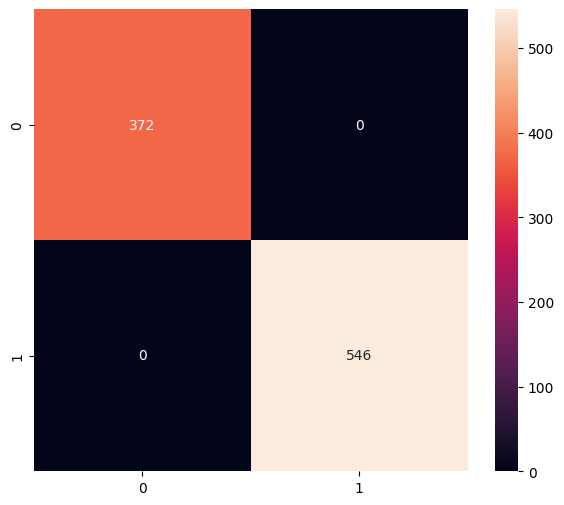

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       372
           1       1.00      1.00      1.00       546

    accuracy                           1.00       918
   macro avg       1.00      1.00      1.00       918
weighted avg       1.00      1.00      1.00       918



In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [79]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [80]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpchnf2rcq/assets


INFO:tensorflow:Assets written to: /var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpchnf2rcq/assets


Saved artifact at '/var/folders/82/6d45jxmx7dv9k2cnwz70lq2c0000gn/T/tmpchnf2rcq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_4')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  14216531024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14203067600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14216539856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14216531408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14216531792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  14218730512: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1746961455.380220 1438394 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1746961455.380231 1438394 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6528

# 推論テスト

In [81]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

/Users/tobi/Documents/coe197z/lib/python3.12/site-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [82]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [83]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [84]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 81 μs, sys: 41 μs, total: 122 μs
Wall time: 125 μs


In [85]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.000000e+00 2.140100e-08 8.473774e-12]
0
